<a href="https://colab.research.google.com/github/samantha-isaac/MusicGenreClassification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models for Music Genre Classification

Link of the dataset from Kaggle: [30000 Spotify Songs](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/datahttps://)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# The dataset is loaded to convert it into a dataframe with Panda's library
filename = '/content/drive/MyDrive/M.S. Data Science/Principles DS/ProyectoFinal/dataset/spotify_songs.csv'
df = pd.read_csv(filename)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# Initial check of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Analysis and Feature Engineer

## Cleaning and feature engineering

In [ ]:
# Searched the null values that the dataset has
df.loc[df['track_album_name'].isna() & df['track_artist'].isna()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


When searching for null values, the dataset showed only five rows that contained several null values, which I decided to remove as compared to the total number of records, it does not affect the end results.

In [ ]:
# By doing this the rows with any null values were eliminated, leaving a total of 32828 rows in total
df = df.dropna()

In [ ]:
# Get the year,month and day of each song and convert the release date to datetime
# Reference obtained from: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date']);

df['release_year'] = df['track_album_release_date'].dt.year
df['release_month'] = df['track_album_release_date'].dt.month
df['release_day'] = df['track_album_release_date'].dt.day

<ipython-input-6-c2089ff48a7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date']);
<ipython-input-6-c2089ff48a7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['track_album_release_date'].dt.year
<ipython-input-6-c2089ff48a7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Convert the miliseconds values into minutes so it's easier to interpret
df['durations_minutes'] = (df['duration_ms'] / 60000).round(2)

<ipython-input-7-9cd7d29b74f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['durations_minutes'] = (df['duration_ms'] / 60000).round(2)


In [ ]:
# Check if all the changes were made correctly
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month,release_day,durations_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6,14,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12,13,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7,5,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7,19,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3,5,3.15


In [ ]:
# There's a total of 4981 songs that appear more than once, this was determined with the name of the track and will try to delete them
track_name_counts = df['track_name'].value_counts()

# Count how many tracks have a frenquency greater than one (indicating duplicates)
duplicated_tracks_count = track_name_counts[track_name_counts > 1].count()
duplicated_tracks_count

4981

In [ ]:
# Drop the duplicated songs based on the name of each track, this was done since a lot of these songs appeared more than once in
# different playlists
df = df.drop_duplicates(subset='track_name', keep='first')
# Show the new size of the dataframe after the changes
df.shape[0]

23449

In doing so, the dataset was significantly reduced, to almost one-third of the total number of records. However, this step was necessary as many songs were repeated more than once across different playlists, which could lead to a bias in the perceived popularity of a particular song or distort the genre classification should the different playlists feature varying genres.

In [ ]:
df = df.drop(columns = ['track_id', 'track_album_id', 'playlist_id', 'duration_ms', 'track_album_name', 'playlist_name', 'track_album_release_date'])

This three id's columns were deleted since they're links to Spotify and are not necesary for the main purpose of this project. The duration_ms is not longer needed since the values were converted into minutes as well as the 'track_album_release_date'. And lastly, the columns of 'track_album_name' and 'playlist_name' are not relevant to the objective of this project

## Analysis

In [ ]:
# To see how many songs are remixes of popular songs
filtered_songs = df[df['track_name'].str.contains('Remix', case = False, na = False)]
filtered_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 0 to 32831
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         1692 non-null   object 
 1   track_artist       1692 non-null   object 
 2   track_popularity   1692 non-null   int64  
 3   playlist_genre     1692 non-null   object 
 4   playlist_subgenre  1692 non-null   object 
 5   danceability       1692 non-null   float64
 6   energy             1692 non-null   float64
 7   key                1692 non-null   int64  
 8   loudness           1692 non-null   float64
 9   mode               1692 non-null   int64  
 10  speechiness        1692 non-null   float64
 11  acousticness       1692 non-null   float64
 12  instrumentalness   1692 non-null   float64
 13  liveness           1692 non-null   float64
 14  valence            1692 non-null   float64
 15  tempo              1692 non-null   float64
 16  release_year       1692

In [ ]:
# To check the genres and their corresponding subegenres
df.groupby(['playlist_genre', 'playlist_subgenre']).size()

playlist_genre  playlist_subgenre        
edm             big room                      784
                electro house                1126
                pop edm                       728
                progressive electro house    1179
latin           latin hip hop                 935
                latin pop                     982
                reggaeton                     535
                tropical                      965
pop             dance pop                    1238
                electropop                   1076
                indie poptimism              1324
                post-teen pop                 934
r&b             hip pop                       604
                neo soul                     1143
                new jack swing                672
                urban contemporary            981
rap             gangster rap                 1141
                hip hop                      1215
                southern hip hop             1428
        

### Correlation Heatmap

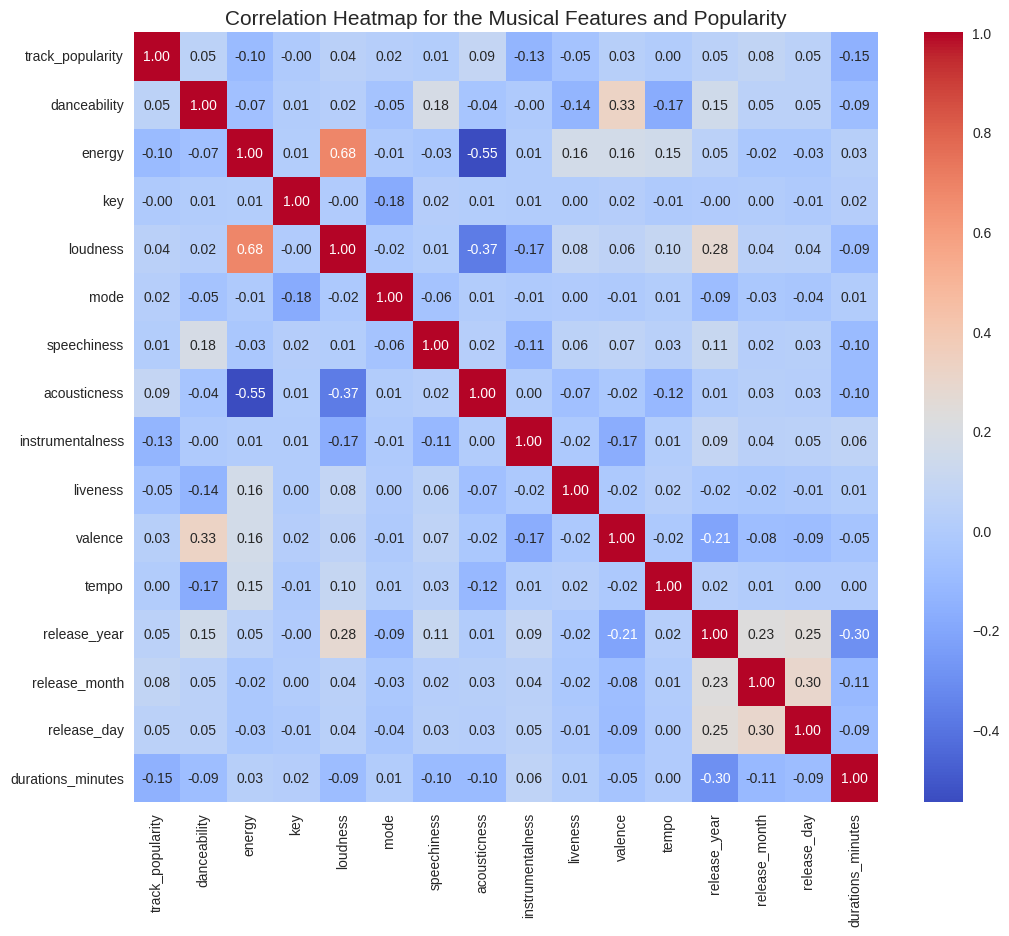

In [ ]:
plt.style.use('seaborn-v0_8')
# Select only the numerical features from the dataset to be able to do the correlation heatmap
numerical_columns = df.select_dtypes(include = ['float64', 'int64'])
# Get the correlation
corr = numerical_columns.corr()
# Plot the Correlation Heatmap for the musical features and the popularity
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap for the Musical Features and Popularity', fontsize = 15)
 # Get the image of the graph. Reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it
plt.savefig('correlation.png', dpi = 300)
plt.show();

* There's no strong correlation between popularity and any specific musical characteristic.
* For Valence and Danceability, there seems to be a moderate correlation, suggesting that songs with more positive tones and greater danceability tend to be more popular.
* On the other hand, for the Acoustiness and Instrumentalness, these characteristics show a negative correlation, indicating that songs with fewer acoustic and instrumental elements might be more popular.

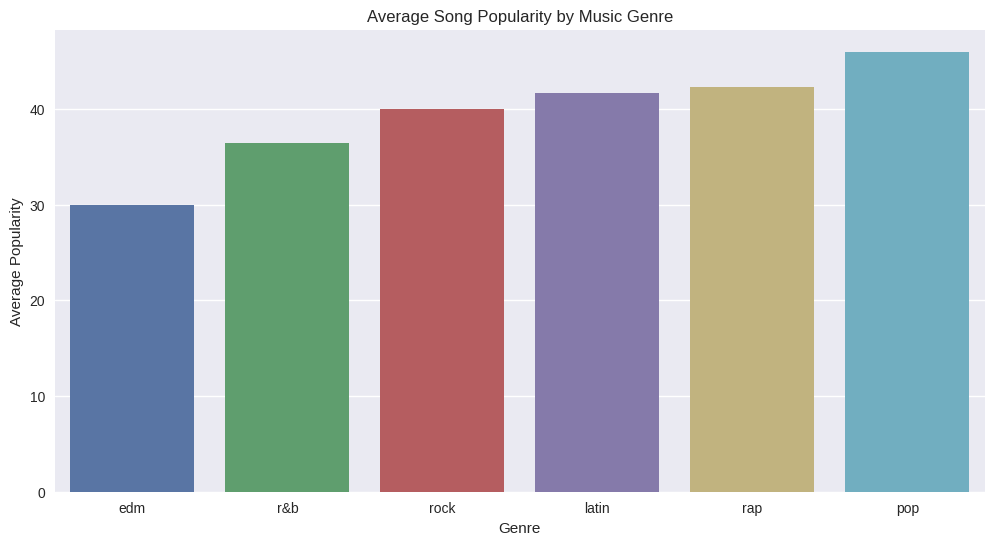

In [ ]:
# Average popularity per music genre and then arrange them from highest to lowest.
average_popularity_per_genre = df.groupby('playlist_genre')['track_popularity'].mean().sort_values()
# Calculate overall average of popularity per genre
overall_average_popularity = df['track_popularity'].mean()
# Plot a barplot that shows the most popular genre
plt.figure(figsize = (12, 6))
sns.barplot(x = average_popularity_per_genre.index, y = average_popularity_per_genre.values)
plt.title('Average Song Popularity by Music Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
# Get the image of the graph. Reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it
plt.savefig('barchart_popularity_genre.png', dpi = 300)
plt.show();

* The most popular genre is Pop, followed by Rap and Latin, which are closely matched in popularity.
* EDM, on the other hand, is the least popular genre.

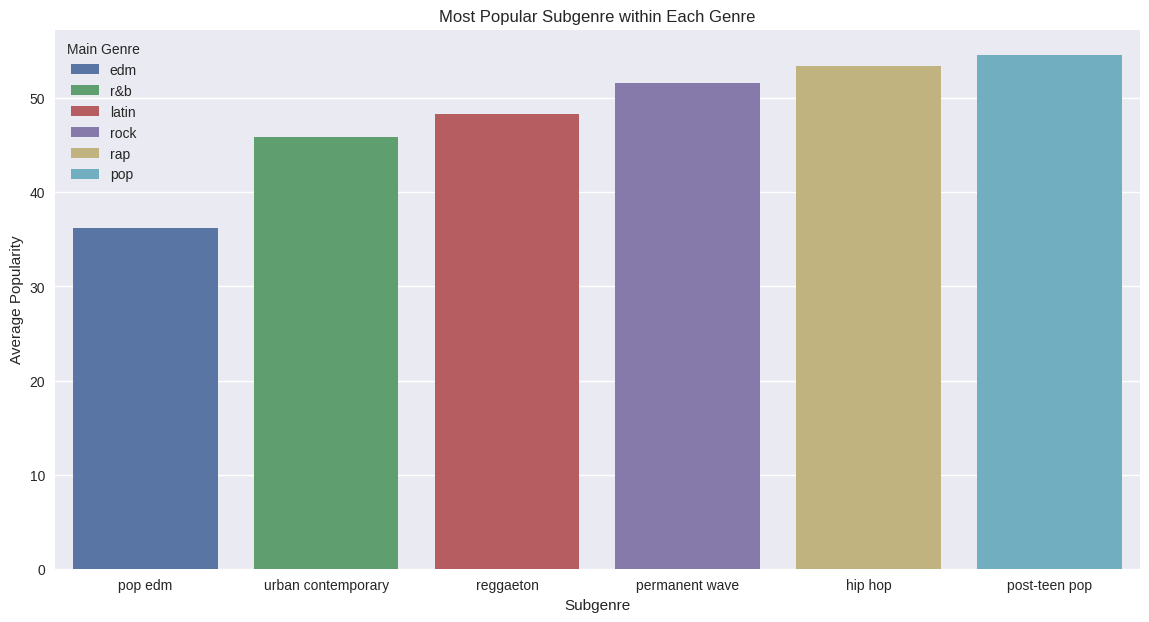

In [ ]:
# Create a new dataframe that contins only the average popularity for each sub-genre
average_popularity_by_subgenre = df.groupby(['playlist_genre', 'playlist_subgenre'])['track_popularity'].mean().reset_index()
# Find the most popular sub-genre within each genre. Reference from: https://pandas.pydata.org/docs/reference/api/pandas.Series.idxmax.html
most_popular_subgenre_by_genre = average_popularity_by_subgenre.loc[average_popularity_by_subgenre.groupby('playlist_genre')['track_popularity'].idxmax()]
# Sorts the genres by highest to lowest popularity.
most_popular_subgenre_by_genre_sorted = most_popular_subgenre_by_genre.sort_values('track_popularity')
# Create a barchart for the most popular sub-genre of each genre
plt.figure(figsize = (14, 7))
sns.barplot(x = 'playlist_subgenre', y = 'track_popularity', hue = 'playlist_genre', data = most_popular_subgenre_by_genre_sorted, dodge = False)
plt.title('Most Popular Subgenre within Each Genre')
plt.xlabel('Subgenre')
plt.ylabel('Average Popularity')
plt.legend(title = 'Main Genre')
# Get the image of the graph. Reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it
plt.savefig('barchart_popularity_subgenre.png', dpi = 300)
plt.show();

* The post-teen pop sub-genre tios the list in Pop's popularity. Interestinglt, for EDM, which ranks as the least popular genre, it's most popular sub-genre is Pop EDM. This suggets there might be a strong relation and that EDM migh be more popular that it may seem to be.

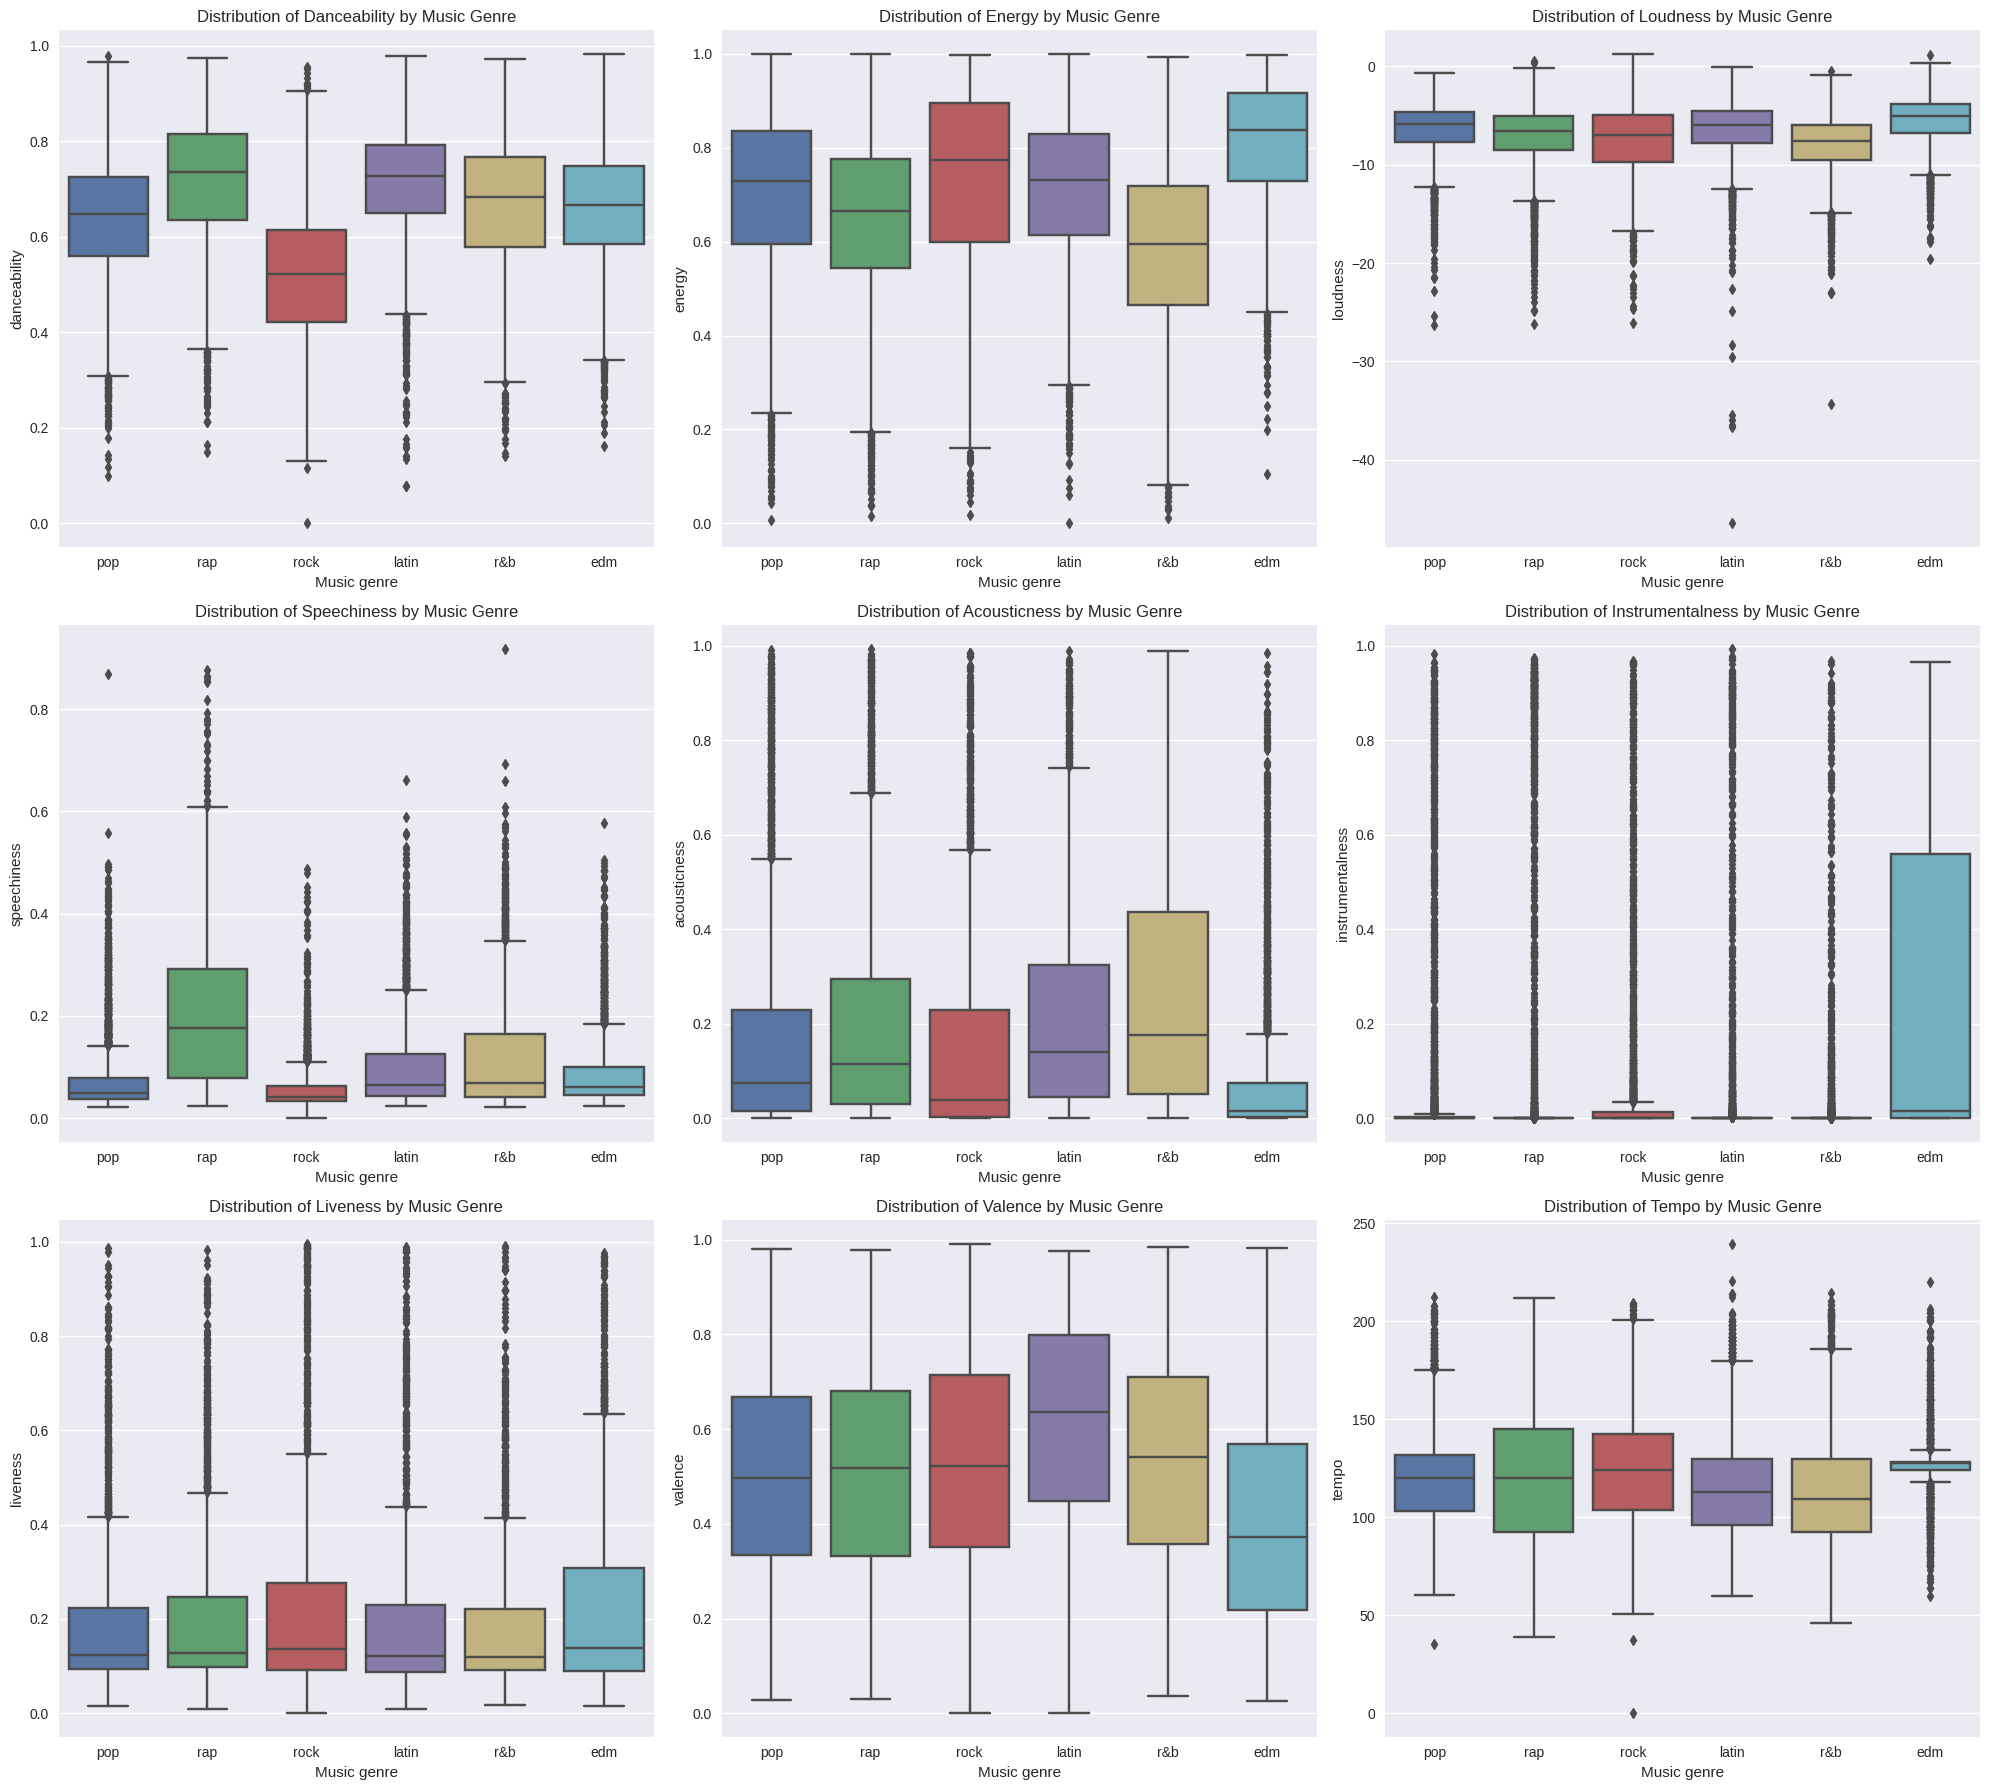

In [ ]:
# Musical features/characteristics to analyse
musical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create boxplot for each feature in a single figure but with multiple graphs with subplots
# Reference from: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
plt.figure(figsize = (20, 18))

for i, feature in enumerate(musical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = 'playlist_genre', y = feature, data = df)
    plt.xlabel('Music genre')
    plt.title(f'Distribution of {feature.capitalize()} by Music Genre')

plt.tight_layout()
# Get the image of the graph. Reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it
plt.savefig('boxplot_muscalCharacteristics_genre.png', dpi = 500)
plt.show();

The most relevant observations are:
* Danceability: Pop and EDM tend to have more danceable songs.
* Energy: Rock and EDM have a higher median, idicating they're more prone to intense and dynamic sounds.
* Loudness: Rock and EDM again have the highest median for this feature.
* Speechiness: Rap has the more enphasis on lyrics.
* Acousticness: Latin and R&B display higher levels of acoustiness, suggesting the presence of most organic instruments.
* Instrumentalness: EDM reflects a more focus on electronic production.
* Liveness: No many songs were performed lived on any genre. The most notoruous one is EDM.
* Valence: Pop and Latin often feature songs with happier or more upbeat sounds.
* Tempo: EDM shows a higher variability in this.

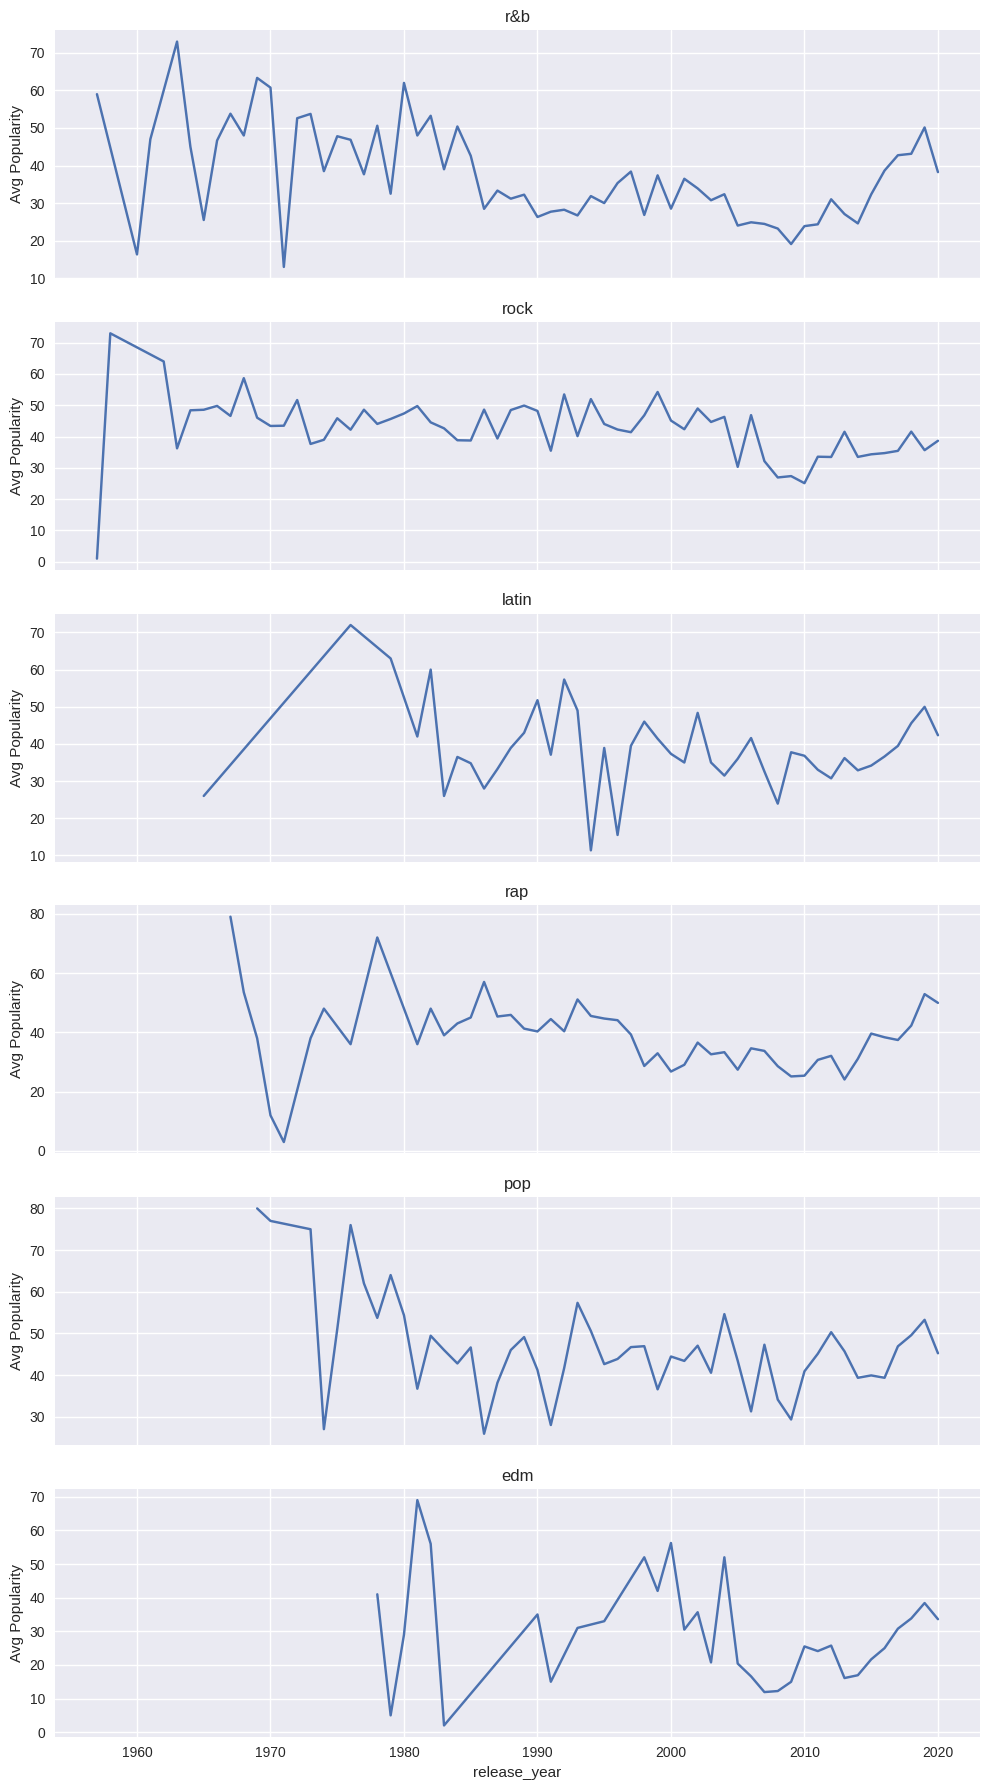

In [ ]:
# Creates a new df with the average popularity of each genre across the years
average_popularity_by_year_genre = df.groupby(['release_year', 'playlist_genre'])['track_popularity'].mean().reset_index()
# Obtain a list of the genres
genres = average_popularity_by_year_genre['playlist_genre'].unique()
# To obtain the total number of genres
num_genres = len(genres)
# Create a lineplot for each genre to compare the year and popularity across all genres
# Reference from: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axes = plt.subplots(num_genres, 1, figsize = (10, 3 * num_genres), sharex = True)

for i, genre in enumerate(genres):
    # Get the values from each genre obtained from the df average_popularity_by_year_genre
    genre_data = average_popularity_by_year_genre[average_popularity_by_year_genre['playlist_genre'] == genre]
    sns.lineplot(ax = axes[i], x = 'release_year', y = 'track_popularity', data = genre_data)
    axes[i].set_title(genre)
    axes[i].set_ylabel('Avg Popularity')

plt.tight_layout()
# Get the image of the graph. Reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it
plt.savefig('lineplot_popularity_genrePerYear.png', dpi = 300)
plt.show();

Relevant information:
* Rock started off with higher popularity which has gradually declined.
* Latin has been having an increase in interest in later years.
* Pop demonstrate high variability in popularity, stabilizing in the latter years.
* EDM had a significant peak in popularity in the 90's followed by a decline and then a resurgence in the 2010's.

# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

## Pre-processing

In [ ]:
# I selected only the numeric values and deleted the date since that's not the values planned to use on the models
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_columns.drop(['release_year', 'release_month', 'release_day'], axis=1)

In [ ]:
# Select the objective column
y = df['track_popularity']
# Select the columns that will train the model to predict popularity, and delete the column to be predicted
X = numeric_columns.drop(columns = 'track_popularity')
# Train test split using the 30% of the data for the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
# Create an instance of the standar scaler to the train and test data so the values are in the same scale
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
scaler = StandardScaler()
# Apply the scaler to the train set
X_train_scaled = scaler.fit_transform(X_train)
# Apply the scaler to the test set
X_test_scaled = scaler.transform(X_test)

## Lineal Regression


In [ ]:
# Instance of the Lienal Regression model
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
reg = LinearRegression()
# Fit the model to the training data
reg.fit(X_train_scaled, y_train)
# Obtain the predictions of the model with both the train and test data
# Obtained from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
train_pred = reg.predict(X_train_scaled)
test_pred = reg.predict(X_test_scaled)

In [ ]:
# Obtain the R2 score from both the train and test pedictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print("R2 for train data: ", round(r2_train, 3))
print("R2 for test data: ", round(r2_test, 3))

R2 for train data:  0.068
R2 for test data:  0.054


In [ ]:
# Obtained the MAE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)
print("MAE for train data: ", round(mae_train, 3))
print("MAE for test data: ", round(mae_test, 3))

MAE for train data:  18.832
MAE for test data:  18.891


In [ ]:
# Obtained the MSE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
print("MSE for train data: ", round(mse_train, 3))
print("MSE for test data: ", round(mse_test, 3))

MSE for train data:  511.119
MSE for test data:  516.793


In [ ]:
# Obtained the RMSE from both the train and test predictions
# Used the same MSE method but obtained the sqrt of the value as the suggestions on the reference
# Reference from: https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
print("RMSE for train data: ", round(rmse_train, 3))
print("RMSE for test data: ", round(rmse_test, 3))

RMSE for train data:  22.608
RMSE for test data:  22.733


## Random Forest Regressor

In [ ]:
# Created the library with the values for the Randomized Search Cross Validation
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instance of the RF for the Rndom Forest with a random state of 42 so it's reproducible
rf_for_search = RandomForestRegressor(random_state = 42)
# Instance of the Randomized Search Cross Validation with the parameters previously instanced on the param_dist library
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf_for_search,
                                   param_distributions = param_dist,
                                   n_iter = 10,
                                   cv = 3,
                                   verbose = 2,
                                   random_state = 42,
                                   n_jobs = -1)

# Fit the Random Search with the trian data
random_search.fit(X_train_scaled, y_train)

# Create a dictionary with the value of the best parameters for each hyperparameter
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
best_params_rf = random_search.best_params_

# Create a new Random Forest with the best parameters dictionary
optimized_rf = RandomForestRegressor(n_estimators = best_params_rf['n_estimators'],
                                     max_features = best_params_rf['max_features'],
                                     max_depth = best_params_rf['max_depth'],
                                     min_samples_split = best_params_rf['min_samples_split'],
                                     min_samples_leaf = best_params_rf['min_samples_leaf'],
                                     bootstrap = best_params_rf['bootstrap'],
                                     random_state = 42)

# Fittig the new Random Forest model with the training data
optimized_rf.fit(X_train_scaled, y_train)

# Obtain the predictions of the model with both the train and test data
# Obtained from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict
train_pred_rf = optimized_rf.predict(X_train_scaled)
test_pred_rf = optimized_rf.predict(X_test_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Obtain the R2 score from both the train and test pedictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
r2_rf_train = r2_score(y_train, train_pred_rf)
r2_rf_test = r2_score(y_test, test_pred_rf)
print('R2 from the train data: ', round(r2_rf_train, 3))
print('R2 from the test data: ', round(r2_rf_test, 3))

R2 from the train data:  0.618
R2 from the test data:  0.079


In [ ]:
# Obtained the MAE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
mae_rf_train = mean_absolute_error(y_train, train_pred_rf)
mae_rf_test = mean_absolute_error(y_test, test_pred_rf)
print('MAE from the train data: ', round(mae_rf_train, 3))
print('MAE from the test data: ', round(mae_rf_test, 3))

MAE from the train data:  11.832
MAE from the test data:  18.552


In [ ]:
# Obtained the MSE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
mse_rf_train = mean_squared_error(y_train, train_pred_rf)
mse_rf_test = mean_squared_error(y_test, test_pred_rf)
print('MSE from the train data: ', round(mse_rf_train, 3))
print('MSE from the test data: ', round(mse_rf_test, 3))

MSE from the train data:  209.707
MSE from the test data:  502.97


In [ ]:
# Obtained the RMSE from both the train and test predictions
# Used the same MSE method but obtained the sqrt of the value as the suggestions on the reference
# Reference from: https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
rmse_rf_train = np.sqrt(mean_squared_error(y_train, train_pred_rf))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, test_pred_rf))
print("RMSE for train data: ", round(rmse_rf_train, 3))
print("RMSE for test data: ", round(rmse_rf_test, 3))

RMSE for train data:  14.481
RMSE for test data:  22.427


## XGBOOST

In [ ]:
# Created the library with the values for the Randomized Search Cross Validation
# Reference from: https://xgboost.readthedocs.io/en/stable/parameter.html
# Reference from: https://xgboost.readthedocs.io/en/stable/treemethod.html
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.5, 1]
}

# Instance of the XGBoost model with a random state 42 so it's reproducible
xgb_model = XGBRegressor(random_state=42)
# Instance of the Randomized Search Cross Validation with the parameters previously instanced on the param_dist library
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the XGBoost model for the Randomized Search Cross Validation with the training data
random_search.fit(X_train_scaled, y_train)

# Create a dictionary with the value of the best parameters for each hyperparameter
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
best_params = random_search.best_params_

# Create a new Random Forest with the best parameters dictionary
optimized_xgb_model = XGBRegressor(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    learning_rate = best_params['learning_rate'],
    subsample = best_params['subsample'],
    colsample_bytree = best_params['colsample_bytree'],
    reg_lambda = best_params['reg_lambda'],
    reg_alpha = best_params['reg_alpha'],
    objective = 'reg:squarederror',
    random_state = 42
)

# Fit the second XGBoost model with the best parameters for the hyperparameters with the trianing data
optimized_xgb_model.fit(X_train_scaled, y_train)

# Obtain the predictions of the model with both the train and test data
# Obtained from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict
train_pred_xgb = optimized_xgb_model.predict(X_train_scaled)
test_pred_xgb = optimized_xgb_model.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Obtain the R2 score from both the train and test pedictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
r2_xgb_train = r2_score(y_train, train_pred_xgb)
r2_xgb_test = r2_score(y_test, test_pred_xgb)
print('R2 from the train data: ', round(r2_xgb_train, 3))
print('R2 from the test data: ', round(r2_xgb_test, 3))

R2 from the train data:  0.194
R2 from the test data:  0.088


In [ ]:
# Obtained the MAE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
mae_xgb_train = mean_absolute_error(y_train, train_pred_xgb)
mae_xgb_test = mean_absolute_error(y_test, test_pred_xgb)
print('MAE from the train data: ', round(mae_xgb_train, 3))
print('MAE from the test data: ', round(mae_xgb_test, 3))

MAE from the train data:  17.401
MAE from the test data:  18.462


In [ ]:
# Obtained the MSE score from both the train and test predictions
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
mse_xgb_train = mean_squared_error(y_train, train_pred_xgb)
mse_xgb_test = mean_squared_error(y_test, test_pred_xgb)
print('MSE from the train data: ', round(mse_xgb_train, 3))
print('MSE from the test data: ', round(mse_xgb_test, 3))

MSE from the train data:  442.146
MSE from the test data:  498.408


In [ ]:
# Obtained the RMSE from both the train and test predictions
# Used the same MSE method but obtained the sqrt of the value as the suggestions on the reference
# Reference from: https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, train_pred_xgb))
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, test_pred_xgb))
print("RMSE for train data: ", round(rmse_xgb_train, 3))
print("RMSE for test data: ", round(rmse_xgb_test, 3))

RMSE for train data:  21.027
RMSE for test data:  22.325
